In [1]:
# for data manipulations
import pandas as pd
import numpy as np
import os

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

# for data splitting
from sklearn.model_selection import train_test_split

# for data processing
from sklearn.preprocessing import StandardScaler

# Label encode target column
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

## Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/BDDA_Mid-Term_Projects/Project2'
os.chdir(path)
os.listdir()

['Placement_Data_Full_Class.csv']

In [6]:
df = pd.read_csv("/content/drive/MyDrive/BDDA_Mid-Term_Projects/Project2/Placement_Data_Full_Class.csv")

In [7]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis

In [8]:
df.shape

(215, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [11]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [12]:
# Checking for null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
# Replacing null vales with mean
df['salary'] = df['salary'].fillna(df['salary'].mean())

In [14]:
# droping the column 'serial no.'
df = df.drop(['sl_no'], axis=1)

In [15]:
# droping the columns for senior and higher secondary boards
df = df.drop(['ssc_b', 'hsc_b'], axis=1)

In [16]:
df['salary_cat'] = pd.cut(df['salary'],                             # Equal interval cuts between min and max
                       3,                                           # Three cuts
                       labels=["average","super", "super_dream"]    # Label for each cut
                       )

In [17]:
df.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status', 'salary', 'salary_cat'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          215 non-null    object  
 1   ssc_p           215 non-null    float64 
 2   hsc_p           215 non-null    float64 
 3   hsc_s           215 non-null    object  
 4   degree_p        215 non-null    float64 
 5   degree_t        215 non-null    object  
 6   workex          215 non-null    object  
 7   etest_p         215 non-null    float64 
 8   specialisation  215 non-null    object  
 9   mba_p           215 non-null    float64 
 10  status          215 non-null    object  
 11  salary          215 non-null    float64 
 12  salary_cat      215 non-null    category
dtypes: category(1), float64(6), object(6)
memory usage: 20.6+ KB


In [19]:
# changing datatype
df['salary_cat'] = df['salary_cat'].astype('object')  

In [20]:
# defining catagorical variables
cat = [col for col in df.columns if df[col].dtypes=='O']
cat

['gender',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status',
 'salary_cat']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

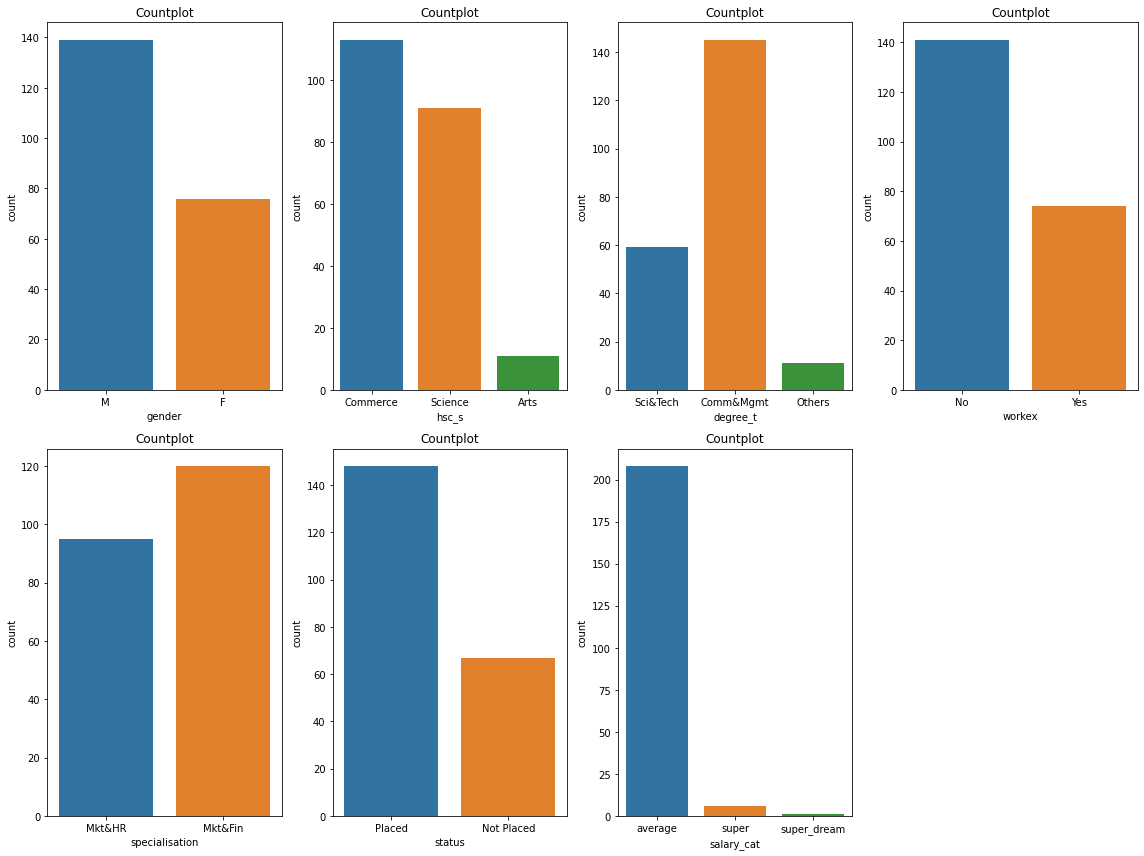

In [21]:
plt.figure(figsize=(16, 12))
n=1
for i in cat:
    plt.subplot(2, 4, n)
    sns.countplot(df[i])
    plt.title(f'Countplot')
    n=n+1
plt.tight_layout()
plt.show()

The above countplots depit the value counts on different parameters like Gender, High-school Stream, Degree, workex, specialisation, placement status and Salary range

In [22]:
# defining numerical variables
num = [col for col in df.columns if df[col].dtypes!='O']
num

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

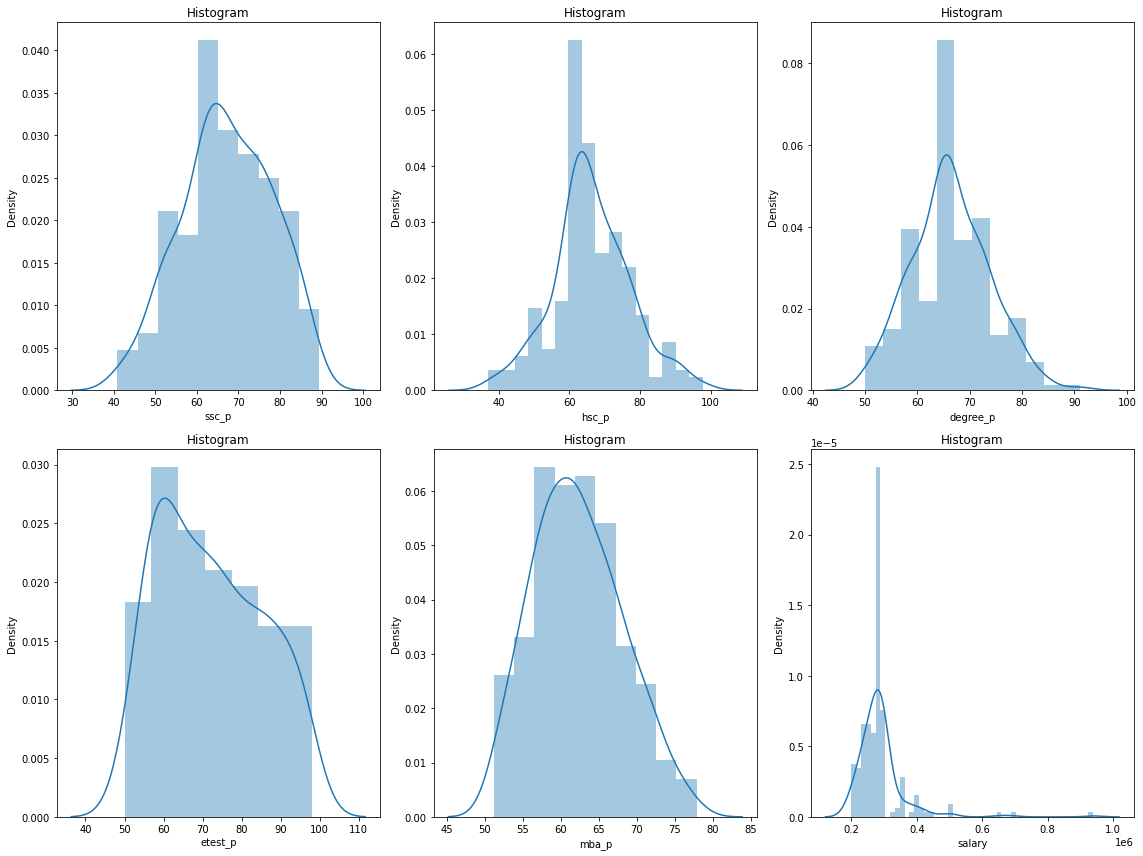

In [23]:
plt.figure(figsize=(16, 12))
n=1
for i in num:
    plt.subplot(2, 3, n)
    sns.distplot(df[i])
    plt.title(f'Histogram')
    n=n+1
plt.tight_layout()
plt.show()

The above Histograms depit the value distribution for different numerical variables.

In [24]:
df.groupby('degree_t')['status'].value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

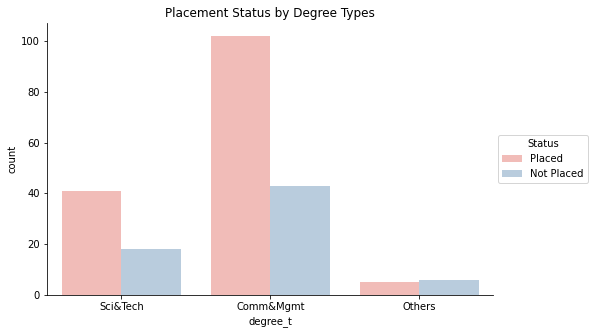

In [25]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="degree_t", data = df, hue ="status" ,palette ="Pastel1" )

# format graph
plt.title("Placement Status by Degree Types")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "Status")

plt.show()

From the above graph, we can say that majority students are place from the commerce and management degree type.
Whereas more than half of the students from 'others' degree type are still unplaced

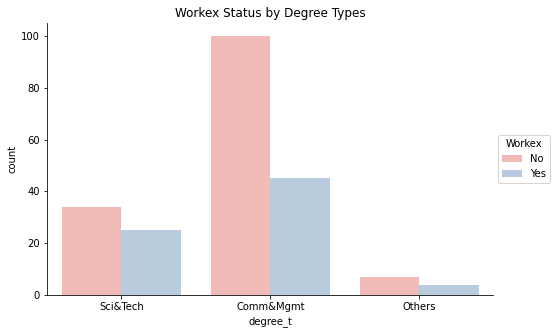

In [26]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="degree_t", data = df, hue ="workex" ,palette ="Pastel1" )

# format graph
plt.title("Workex Status by Degree Types")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "Workex")

plt.show()

From the above graph we can say that, majority students from commerce and management stream do not have work ex.
Also, there are more freshers than people with work ex.

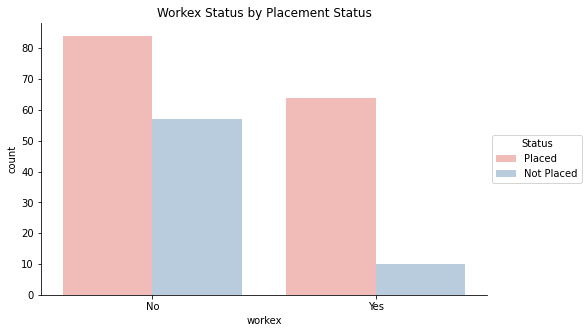

In [27]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="workex", data = df, hue ="status" ,palette ="Pastel1" )

# format graph
plt.title("Workex Status by Placement Status")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "Status")

plt.show()

From the above graph we can say that, more than 70% of the people having workex are placed, whereas ony approx 60% people without workex are placed

Text(0.5, 1.0, 'Share of Placed and Not placed')

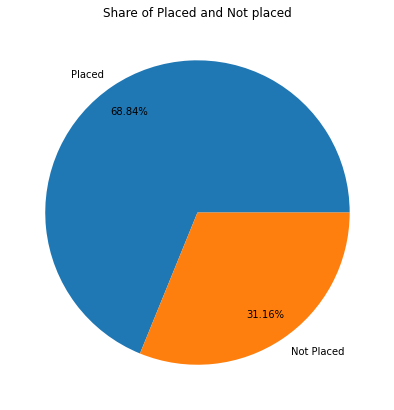

In [28]:
# Share of placed and not-placed candidated
plt.figure(figsize=(7,7))
plt.pie(df["status"].value_counts(),
        labels=list(df["status"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );
plt.title("Share of Placed and Not placed")

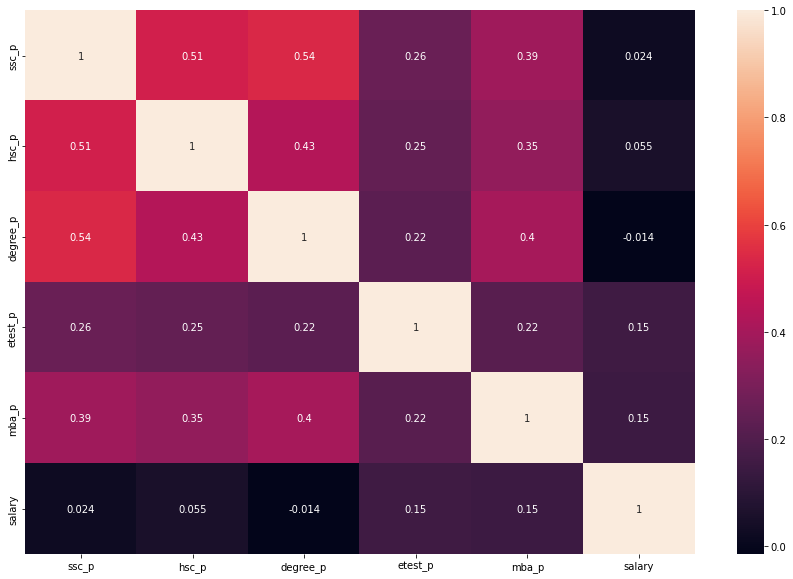

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot = True)

1. Salary is highly corelated with mba_p and etest_p.
2. mba_p is also corelated with etest_p as well as hsc_p and ssc _p, but salary not so much.
3. Whether Placed or not depends mainly on ssc_p,hsc_p,degree_p.
4. Status is not so dependent on gender but salary depends on gender.

Text(0.5, 1.0, 'Specialisation and Marks comparison on the Basis of Gender')

<Figure size 432x288 with 0 Axes>

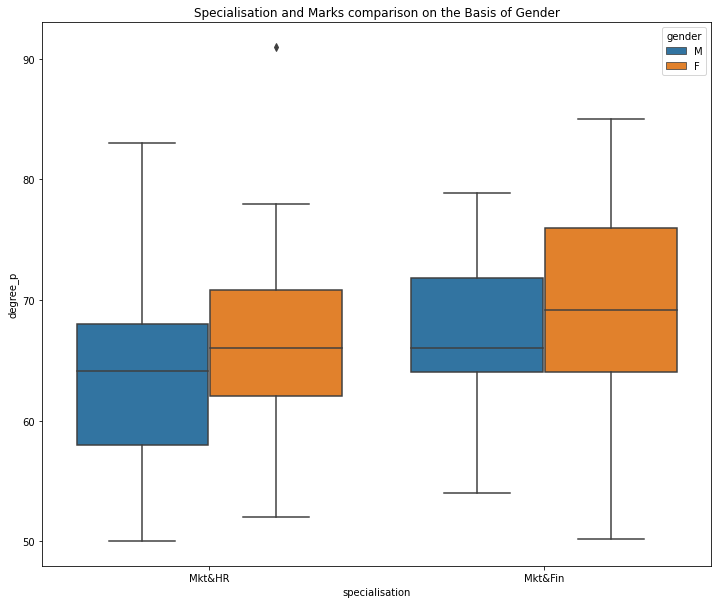

In [30]:
# graph for the relationship between Specialisation and Marks on the Basis of Gender
plt.figure()
plt.figure(figsize=(12,10))
sns.boxplot(x='specialisation',y='degree_p',hue='gender', data=df)
plt.title("Specialisation and Marks comparison on the Basis of Gender")

It can be seen clearly that females in both specialisations score more.
The median percentages of both males and females is higher for marketing & Finance

Text(0.5, 1.0, 'Specialisation and Marks comparison on the Basis of Placement Status')

<Figure size 432x288 with 0 Axes>

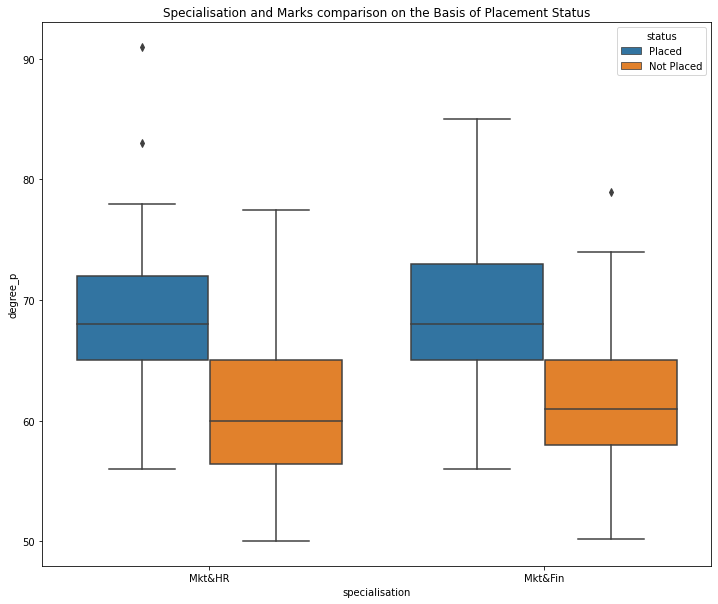

In [31]:
# Graph for the relationship between Specialisation and Marks on the Basis of Placement Status
plt.figure()
plt.figure(figsize=(12,10))
sns.boxplot(x='specialisation',y='degree_p',hue='status', data=df)
plt.title("Specialisation and Marks comparison on the Basis of Placement Status")

As seen, people with higher scores are placed for both the specialisations

## Checking Structure in Data

In [32]:
ss= StandardScaler()

In [33]:
nc = ss.fit_transform(df.loc[:,num])

In [34]:
nc.shape 

(215, 6)

In [35]:
nc = pd.DataFrame(nc, columns = num)
nc.head(2)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,-0.241408
1,1.113369,1.103448,1.513267,1.087157,0.687620,-1.147234


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    nc[i] = le.fit_transform(df[i])

In [37]:
from numpy.random import default_rng
rng = default_rng()

In [38]:
rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (215,6)),
                       columns = num   # Assign column names, just like that
                       )

In [39]:
# Creating dataframe from random data
nc_rand['gender'] = np.random.randint(2,   size= (215,))   # [0,1]
nc_rand['hsc_s'] = np.random.randint(1,4,   size= (215,))   # [1,2,3]
nc_rand['degree_t'] = np.random.randint(1,4, size= (215,))   # [1,2,3]
nc_rand['workex'] = np.random.randint(2,  size= (215,))   # [0,1]
nc_rand['specialisation'] = np.random.randint(2,   size= (215,))   # [0,1]
nc_rand['status'] = np.random.randint(2,   size= (215,))   # [0,1]
nc_rand['salary_cat'] = np.random.randint(1,4,   size= (215,)) 

## Parallel Coordinates Plot

Text(0.5, 1.0, 'Parallel chart with random data')

<Figure size 432x288 with 0 Axes>

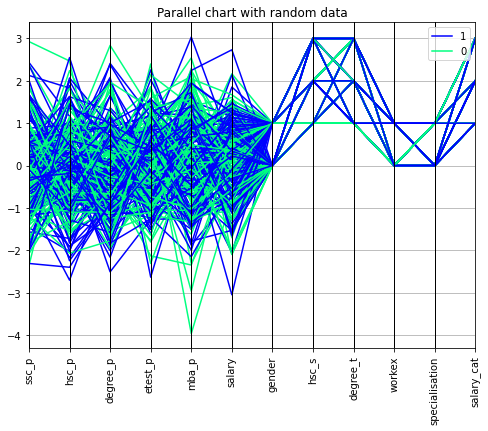

In [40]:
# Parallel coordinates with random data

fig1 = plt.figure()
plt.figure(figsize=(8,6))
pd.plotting.parallel_coordinates(nc_rand,
                                 'status',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

Text(0.5, 1.0, "Parallel chart with 'placement' data")

<Figure size 432x288 with 0 Axes>

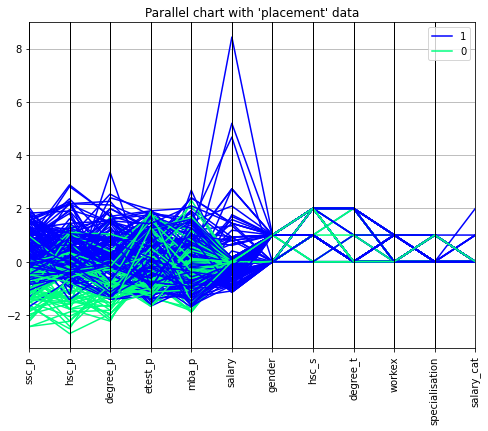

In [41]:
# Parallel coordinates with 'placements' data
fig2 = plt.figure()
plt.figure(figsize=(8,6))
ax = pd.plotting.parallel_coordinates(nc,
                                 'status',
                                  colormap= 'winter'
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with 'placement' data")

## Andrews Plot

Text(0.5, 1.0, 'Andrews plots with random data')

<Figure size 432x288 with 0 Axes>

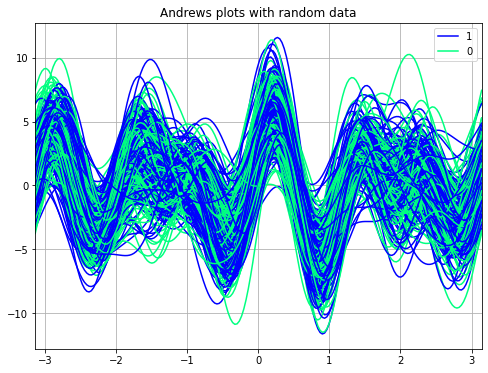

In [42]:
# Andrews chart with random data
fig3 = plt.figure()
plt.figure(figsize=(8,6))
pd.plotting.andrews_curves(nc_rand,
                           'status',
                           colormap = 'winter')

plt.title("Andrews plots with random data")

Text(0.5, 1.0, 'Andrews curve with original data')

<Figure size 432x288 with 0 Axes>

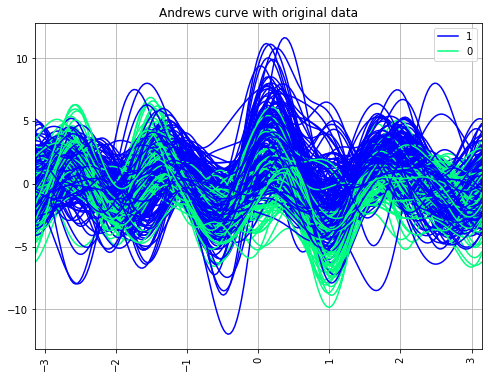

In [43]:
# Andrews curve chart with orignal data
fig4 = plt.figure()
plt.figure(figsize=(8,6))
pd.plotting.andrews_curves(nc,
                           'status',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with original data")

In [45]:
#  Popout target
#  to separate predictors and target

y = df['status']

# 3.4   Create an alias of predictors dataset 
X = df   # X is another name for df

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[cat] = X[cat].apply(le.fit_transform)

In [47]:
y = y.map({'Placed':1, 'Not Placed' : 0})

In [48]:
X.min().min()           # -999.0
X.max().max()           # 4543.913

# Save memory

X = X.astype('float32')

In [49]:
X.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status', 'salary', 'salary_cat'],
      dtype='object')

In [50]:
cat_c = ['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation']

In [51]:
# Store column names somewhere
# for use in feature importance

colnames = X.columns.tolist()

In [55]:
#  Split dataset. We will preprocess X_train and apply that
#     processing to X_test later
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2      # split-ratio
                                                    )

## Create Pipeline - Using XiBoost

In [58]:
# Pipe using XGBoost

from sklearn.decomposition import PCA

steps_xg = [('sts', StandardScaler() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

In [59]:
pipe_xg = Pipeline(steps_xg)

In [60]:
# Grid Search
# What parameters in the pipe are available for tuning
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [62]:
# Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }                               

In [63]:
# Define revised dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [2,11],
               }                               # Total: 2 * 2 * 2 * 2


In [65]:
# Grid Search iterations
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [67]:
import time

In [68]:
# Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60    



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits



0.028428133328755698

In [101]:
# Best Score
f"Best score: {clf.best_score_} "          

'Best score: 0.993821984026902 '

In [103]:
# Best parameter set
f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 11, 'xg__learning_rate': 0.03, 'xg__max_depth': 4}"

In [71]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

--Few predictions--



--Accuracy Score--



--Confusion Matrix--



--F1 Score pos-label: 1--



--F1 Score pos-label: 0--



--ROC curve--



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


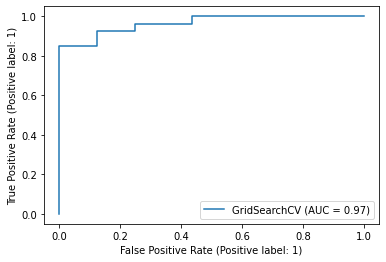

In [72]:
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 82.11165535218126'

# 7.6 Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# 7.7 F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)      # 0.8664199696263183

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)      # 0.729313857223354

# 7.8 ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [73]:
print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

#
print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



---Feature importances---



array([0.5399697 , 0.01056185, 0.00552753, 0.28372082, 0.06672382,
       0.03586828, 0.03116292, 0.018767  , 0.        , 0.        ,
       0.00769811], dtype=float32)

In [74]:
imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

In [75]:
len(imp_values)

11

In [76]:
list(zip(df.columns, imp_values))

[('gender', 0.5399697),
 ('ssc_p', 0.01056185),
 ('hsc_p', 0.005527532),
 ('hsc_s', 0.28372082),
 ('degree_p', 0.066723816),
 ('degree_t', 0.035868276),
 ('workex', 0.031162918),
 ('etest_p', 0.018767001),
 ('specialisation', 0.0),
 ('mba_p', 0.0),
 ('status', 0.007698115)]

In [77]:
index = ['gender','ssc_p','hsc_p','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p','status']

In [82]:
# Create a dataframe of feature importances
# with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = index,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

In [80]:
df_imp

,imp
specialisation,0.000000
mba_p,0.000000
hsc_p,0.005528
status,0.007698
ssc_p,0.010562
etest_p,0.018767
workex,0.031163
degree_t,0.035868
degree_p,0.066724
hsc_s,0.283721


In [81]:
# First five columns with least feature importance are:

list(df_imp.index.values[:5])

['specialisation', 'mba_p', 'hsc_p', 'status', 'ssc_p']

In [83]:
# Let us drop these from X_train and X_test
Xtrain = X_train.drop(columns = list(df_imp.index.values[:5]))
Xtest = X_test.drop(columns = list(df_imp.index.values[:5]))

# Build model again with reduced dataset
clf_dr = GridSearchCV(pipe_xg,            # pipeline object
                      parameters,         # possible parameters
                      n_jobs = 2,         # USe parallel cpu threads
                      cv =3 ,             # No of folds
                      verbose =2,         # Higher the value, more the verbosity
                      scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                      refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                     )

start = time.time()
clf_dr.fit(Xtrain, y_train)
end = time.time()
(end - start)/60               # 25 minutes

# Make predictions
y_pred_dr = clf_dr.predict(Xtest)

# Compare results.
#  Results may be marginally better
f1_score(y_test,y_pred_dr, pos_label = 1)      # 0.8664199696263183
f1_score(y_test,y_pred_dr, pos_label = 0)      # 0.729313857223354
f1_score(y_test,y_pred, pos_label = 1)      # 0.8664199696263183
f1_score(y_test,y_pred, pos_label = 0)      # 0.729313857223354

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line

0.875

## Randomized Search

In [86]:
# Tune parameters using randomized search
# Hyperparameters to tune and their ranges
from scipy.stats import uniform
parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(2,11)}

In [87]:
# Tune parameters using random search
# Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )

In [88]:
# Run random search for 25 iterations.

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   

Fitting 2 folds for each of 4 candidates, totalling 8 fits



0.03009694814682007

In [94]:
# Evaluate
f"Best score: {rs.best_score_} "

'Best score: 0.9885760823875578 '

In [96]:
# Evaluate
f"Best parameter set: {rs.best_params_} "

"Best parameter set: {'pca__n_components': 6, 'xg__learning_rate': 0.641773865277749, 'xg__max_depth': 9, 'xg__n_estimators': 196} "

In [97]:
# Make predictions from the best returned model
y_pred = rs.predict(X_test)

In [98]:
# 9.5 Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}" 

'Accuracy: 90.69767441860465'

In [100]:
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1)}" 

'f1 score: 0.9259259259259259'